In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
import string
import re
from nltk.probability import FreqDist
from wordcloud import WordCloud
import collections

In [2]:
url = "https://www.amazon.in/Redmi-Storage-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QS8V5N8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
reviewlist = []

def get_soup(url):
    r = requests.get(url) # or....r = requests.get("http://localhost:8080/render.html", params = {"url" : url , "wait" :2}) 
    soup = BeautifulSoup(r.text, "html.parser")
    return soup

def get_reviews(soup):
    reviews = soup.find_all("div", {"data-hook" : "review"})    
    try:
        for item in reviews:
            review = {
            "title" : item.find("a", {"data-hook" : "review-title"}).text.strip(),
            "rating" : float(item.find("i", {"data-hook" : "review-star-rating"}).text.replace("out of 5 stars", "").strip()), # return starts values & float to replace this 3.0 out of 5 stars to this 3.0
            "body" : item.find("span", {"data-hook" : "review-body"}).text.strip(),
             }
            reviewlist.append(review)
    except:
        pass
    
for x in range(1,100):
    soup = get_soup("https://www.amazon.in/Redmi-Storage-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QS8V5N8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")        
    print(f"Getting page:{x}")
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find("li", {"class" : "a-disabled a-last"}):
        pass
    else:
        break
            

Getting page:1
0
Getting page:2
10
Getting page:3
10
Getting page:4
10
Getting page:5
10
Getting page:6
20
Getting page:7
20
Getting page:8
20
Getting page:9
30
Getting page:10
30
Getting page:11
40
Getting page:12
50
Getting page:13
50
Getting page:14
50
Getting page:15
50
Getting page:16
50
Getting page:17
60
Getting page:18
60
Getting page:19
60
Getting page:20
70
Getting page:21
70
Getting page:22
80
Getting page:23
90
Getting page:24
90
Getting page:25
90
Getting page:26
100
Getting page:27
100
Getting page:28
100
Getting page:29
110
Getting page:30
110
Getting page:31
110
Getting page:32
110
Getting page:33
110
Getting page:34
110
Getting page:35
120
Getting page:36
130
Getting page:37
140
Getting page:38
140
Getting page:39
140
Getting page:40
140
Getting page:41
140
Getting page:42
140
Getting page:43
150
Getting page:44
150
Getting page:45
150
Getting page:46
160
Getting page:47
160
Getting page:48
160
Getting page:49
160
Getting page:50
160
Getting page:51
160
Getting page:52

In [3]:
print(soup.title.text)

Amazon.in:Customer reviews: Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)|90Hz FHD+ AMOLED Display | Qualcomm® Snapdragon™ 680-6nm | 33W Charger Included | Get 2 Months of YouTube Premium Free!


In [4]:
soup = get_soup("https://www.amazon.in/Redmi-Storage-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QS8V5N8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1")        
get_reviews(soup)
print(len(reviewlist))

370


In [5]:
df = pd.DataFrame(reviewlist)
df

title  rating  \
0                  Don't purchase it as camera phone 😤     4.0   
1                A good phone when you buy it in offer     4.0   
2                          useful phone in this budget     4.0   
3                                     Good 👍I must say     4.0   
4    Best product at this price but less than avera...     4.0   
..                                                 ...     ...   
365                                Not for photography     4.0   
366                        Overall performance is good     4.0   
367                                             No 4k,     4.0   
368                    Phone is good for regular users     4.0   
369                                 EXCELLENT💯👍👍 PHONE     4.0   

                                                  body  
0    The first look of this starbust design is eye ...  
1    A phone with great camera 🤳. It performs reall...  
2    this phone's main plus points are amoled scree...  
3    It's amazing to use this phone i love it but i...  
4    Everything is good at this price, but only cam...  
..                                                 ...  
365  The phone has got some good speakers battery 🔋...  
366  Overall performance is good,Battery lasts upto...  
367  Overall good but camera quality is worst..No 4...  
368  Apt for people who are looking for WhatsApp an...  
369  Osm phone in this range... Working gud... Proc...  

[370 rows x 3 columns]

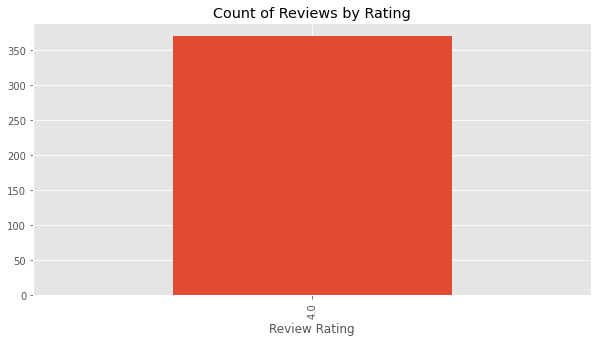

In [6]:
ax = df["rating"].value_counts().sort_index().plot(kind = "bar",
                                              title = "Count of Reviews by Rating" , 
                                              figsize = (10,5))
ax.set_xlabel("Review Rating")
plt.show()

In [7]:
df = [body.strip() for body in df.body] # remove both the leading and the trailing characters
df = [body for body in df if body] # removes empty strings, because they are considered in Python as False
df[0:10]

["The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but th

In [8]:
# Joining the list into one string/text
text = ' '.join(df)
text

'The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it\'s all physical dimension. the second this which impress me, it\'s battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it\'s dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it\'s amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but

In [9]:
len(text)

187626

In [10]:
# nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
text=tknzr.tokenize(text)

text=' '.join(text)
text

'The first look of this starbust design is eye catchy ... no word to express its design , in hand feel and and it\'s all physical dimension . the second this which impress me , it\'s battery backup ... even you playing game hardly for a long time ... it gives you sufficient battey backup and charging speed also 33W , is also a good deal at this price . The third impressive factor is it\'s dual speaker ... I have an another phone of 40k and the sound quality is almost same as it . Media playback experience is also enhanced by it\'s amoled display , very colour charming display ... literally the display quality is unbeatable . The camera notch and dual speaker increase the media playing experience . Other Performance like gaming is also good at this price point . Fingerprint button is also very responsive . All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional p

In [12]:
len(text)

190586

In [13]:
# Remove Punctuations 
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

# remove link and others
no_punc_text= re.sub(r'http\S+', '', no_punc_text)
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() #remove special character
no_punc_text = re.sub('\[.*?\]', '', no_punc_text)
no_punc_text = re.sub('https?://\S+|www\.\S+', '', no_punc_text)
no_punc_text = re.sub('<.*?>+', '', no_punc_text)
no_punc_text = re.sub('[%s]' % re.escape(string.punctuation), '', no_punc_text)
no_punc_text = re.sub('\n', '', no_punc_text)
no_punc_text = re.sub('\w*\d\w*', '', no_punc_text)
no_punc_text

'the first look of this starbust design is eye catchy no word to express its design in hand feel and and its all physical dimension the second this which impress me its battery backup even you playing game hardly for a long time it gives you sufficient battey backup and charging speed also w is also a good deal at this price the third impressive factor is its dual speaker i have an another phone of k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower grade even my old re

In [14]:
len(no_punc_text)

179376

In [15]:
# nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['the', 'first', 'look', 'of', 'this', 'starbust', 'design', 'is', 'eye', 'catchy', 'no', 'word', 'to', 'express', 'its', 'design', 'in', 'hand', 'feel', 'and', 'and', 'its', 'all', 'physical', 'dimension', 'the', 'second', 'this', 'which', 'impress', 'me', 'its', 'battery', 'backup', 'even', 'you', 'playing', 'game', 'hardly', 'for', 'a', 'long', 'time', 'it', 'gives', 'you', 'sufficient', 'battey', 'backup', 'and']


In [17]:
len(text_tokens)


34040

In [18]:
#importing given stopwords file
with open("/content/stop.txt") as stop_words:
    stop_words = stop_words.read()
    print(stop_words)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [19]:
# Joinining all the reviews into single paragraph 
text_tokens = " ".join(text_tokens)
text_tokens

'the first look of this starbust design is eye catchy no word to express its design in hand feel and and its all physical dimension the second this which impress me its battery backup even you playing game hardly for a long time it gives you sufficient battey backup and charging speed also w is also a good deal at this price the third impressive factor is its dual speaker i have an another phone of k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower grade even my old re

In [20]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(''.join(text_tokens))
print(doc)

the first look of this starbust design is eye catchy no word to express its design in hand feel and and its all physical dimension the second this which impress me its battery backup even you playing game hardly for a long time it gives you sufficient battey backup and charging speed also w is also a good deal at this price the third impressive factor is its dual speaker i have an another phone of k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower grade even my old red

In [21]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['the', 'first', 'look', 'of', 'this', 'starbust', 'design', 'be', 'eye', 'catchy', 'no', 'word', 'to', 'express', 'its', 'design', 'in', 'hand', 'feel', 'and', 'and', 'its', 'all', 'physical', 'dimension', 'the', 'second', 'this', 'which', 'impress', 'I', 'its', 'battery', 'backup', 'even', 'you', 'play', 'game', 'hardly', 'for', 'a', 'long', 'time', 'it', 'give', 'you', 'sufficient', 'battey', 'backup', 'and', 'charge', 'speed', 'also', 'w', 'be', 'also', 'a', 'good', 'deal', 'at', 'this', 'price', 'the', 'third', 'impressive', 'factor', 'be', 'its', 'dual', 'speaker', 'I', 'have', 'an', 'another', 'phone', 'of', 'k', 'and', 'the', 'sound', 'quality', 'be', 'almost', 'same', 'as', 'it', 'medium', 'playback', 'experience', 'be', 'also', 'enhance', 'by', 'its', 'amole', 'display', 'very', 'colour', 'charming', 'display', 'literally', 'the', 'display', 'quality', 'be', 'unbeatable', 'the', 'camera', 'notch', 'and', 'dual', 'speaker', 'increase', 'the', 'medium', 'playing', 'experience',

In [22]:
# Normalize the data
lemmas=[Text.lower() for Text in lemmas]
print(lemmas)

['the', 'first', 'look', 'of', 'this', 'starbust', 'design', 'be', 'eye', 'catchy', 'no', 'word', 'to', 'express', 'its', 'design', 'in', 'hand', 'feel', 'and', 'and', 'its', 'all', 'physical', 'dimension', 'the', 'second', 'this', 'which', 'impress', 'i', 'its', 'battery', 'backup', 'even', 'you', 'play', 'game', 'hardly', 'for', 'a', 'long', 'time', 'it', 'give', 'you', 'sufficient', 'battey', 'backup', 'and', 'charge', 'speed', 'also', 'w', 'be', 'also', 'a', 'good', 'deal', 'at', 'this', 'price', 'the', 'third', 'impressive', 'factor', 'be', 'its', 'dual', 'speaker', 'i', 'have', 'an', 'another', 'phone', 'of', 'k', 'and', 'the', 'sound', 'quality', 'be', 'almost', 'same', 'as', 'it', 'medium', 'playback', 'experience', 'be', 'also', 'enhance', 'by', 'its', 'amole', 'display', 'very', 'colour', 'charming', 'display', 'literally', 'the', 'display', 'quality', 'be', 'unbeatable', 'the', 'camera', 'notch', 'and', 'dual', 'speaker', 'increase', 'the', 'medium', 'playing', 'experience',

In [23]:
stop_tokens = [word for word in lemmas if not word in stop_words]
print(stop_tokens[0:40])

['starbust', 'design', 'eye', 'catchy', 'word', 'express', 'design', 'feel', 'physical', 'dimension', 'impress', 'battery', 'backup', 'play', 'game', 'sufficient', 'battey', 'backup', 'charge', 'speed', 'good', 'deal', 'price', 'impressive', 'factor', 'dual', 'speaker', 'phone', 'sound', 'quality', 'medium', 'playback', 'experience', 'enhance', 'amole', 'display', 'colour', 'charming', 'display', 'literally']


In [24]:
clean_reviews=' '.join(stop_tokens)
clean_reviews

'starbust design eye catchy word express design feel physical dimension impress battery backup play game sufficient battey backup charge speed good deal price impressive factor dual speaker phone sound quality medium playback experience enhance amole display colour charming display literally display quality unbeatable camera notch dual speaker increase medium playing experience performance gaming good price point fingerprint button responsive feature good price pointonly disappointing bcoz hype camera company show mark professional photography camera grade redmi exchange camera plz request buy camera image show camera picture website illustration recommend buy phone camera phoneif camera user surely itpro design inhand feel battery charge amole display dual speakercon camera phone great camera perform good light condition recommend camera lover budget phone decent performance point pass fingerprint sensor slow response touch wait open apprest haptic feedback phone good display nice ref

In [25]:
fd_tokens_lemmas = FreqDist(stop_tokens)
fd_tokens_lemmas.most_common(10)

[('camera', 814),
 ('phone', 592),
 ('good', 407),
 ('battery', 333),
 ('speaker', 222),
 ('quality', 222),
 ('display', 222),
 ('buy', 222),
 ('feel', 148),
 ('price', 148)]

In [26]:
pd.DataFrame.from_records([fd_tokens_lemmas]).T.sort_values(0,ascending=False).head(100)


0
camera     814
phone      592
good       407
battery    333
display    222
...        ...
people      37
fps         37
megapixel   37
window      37
multi       37

[100 rows x 1 columns]

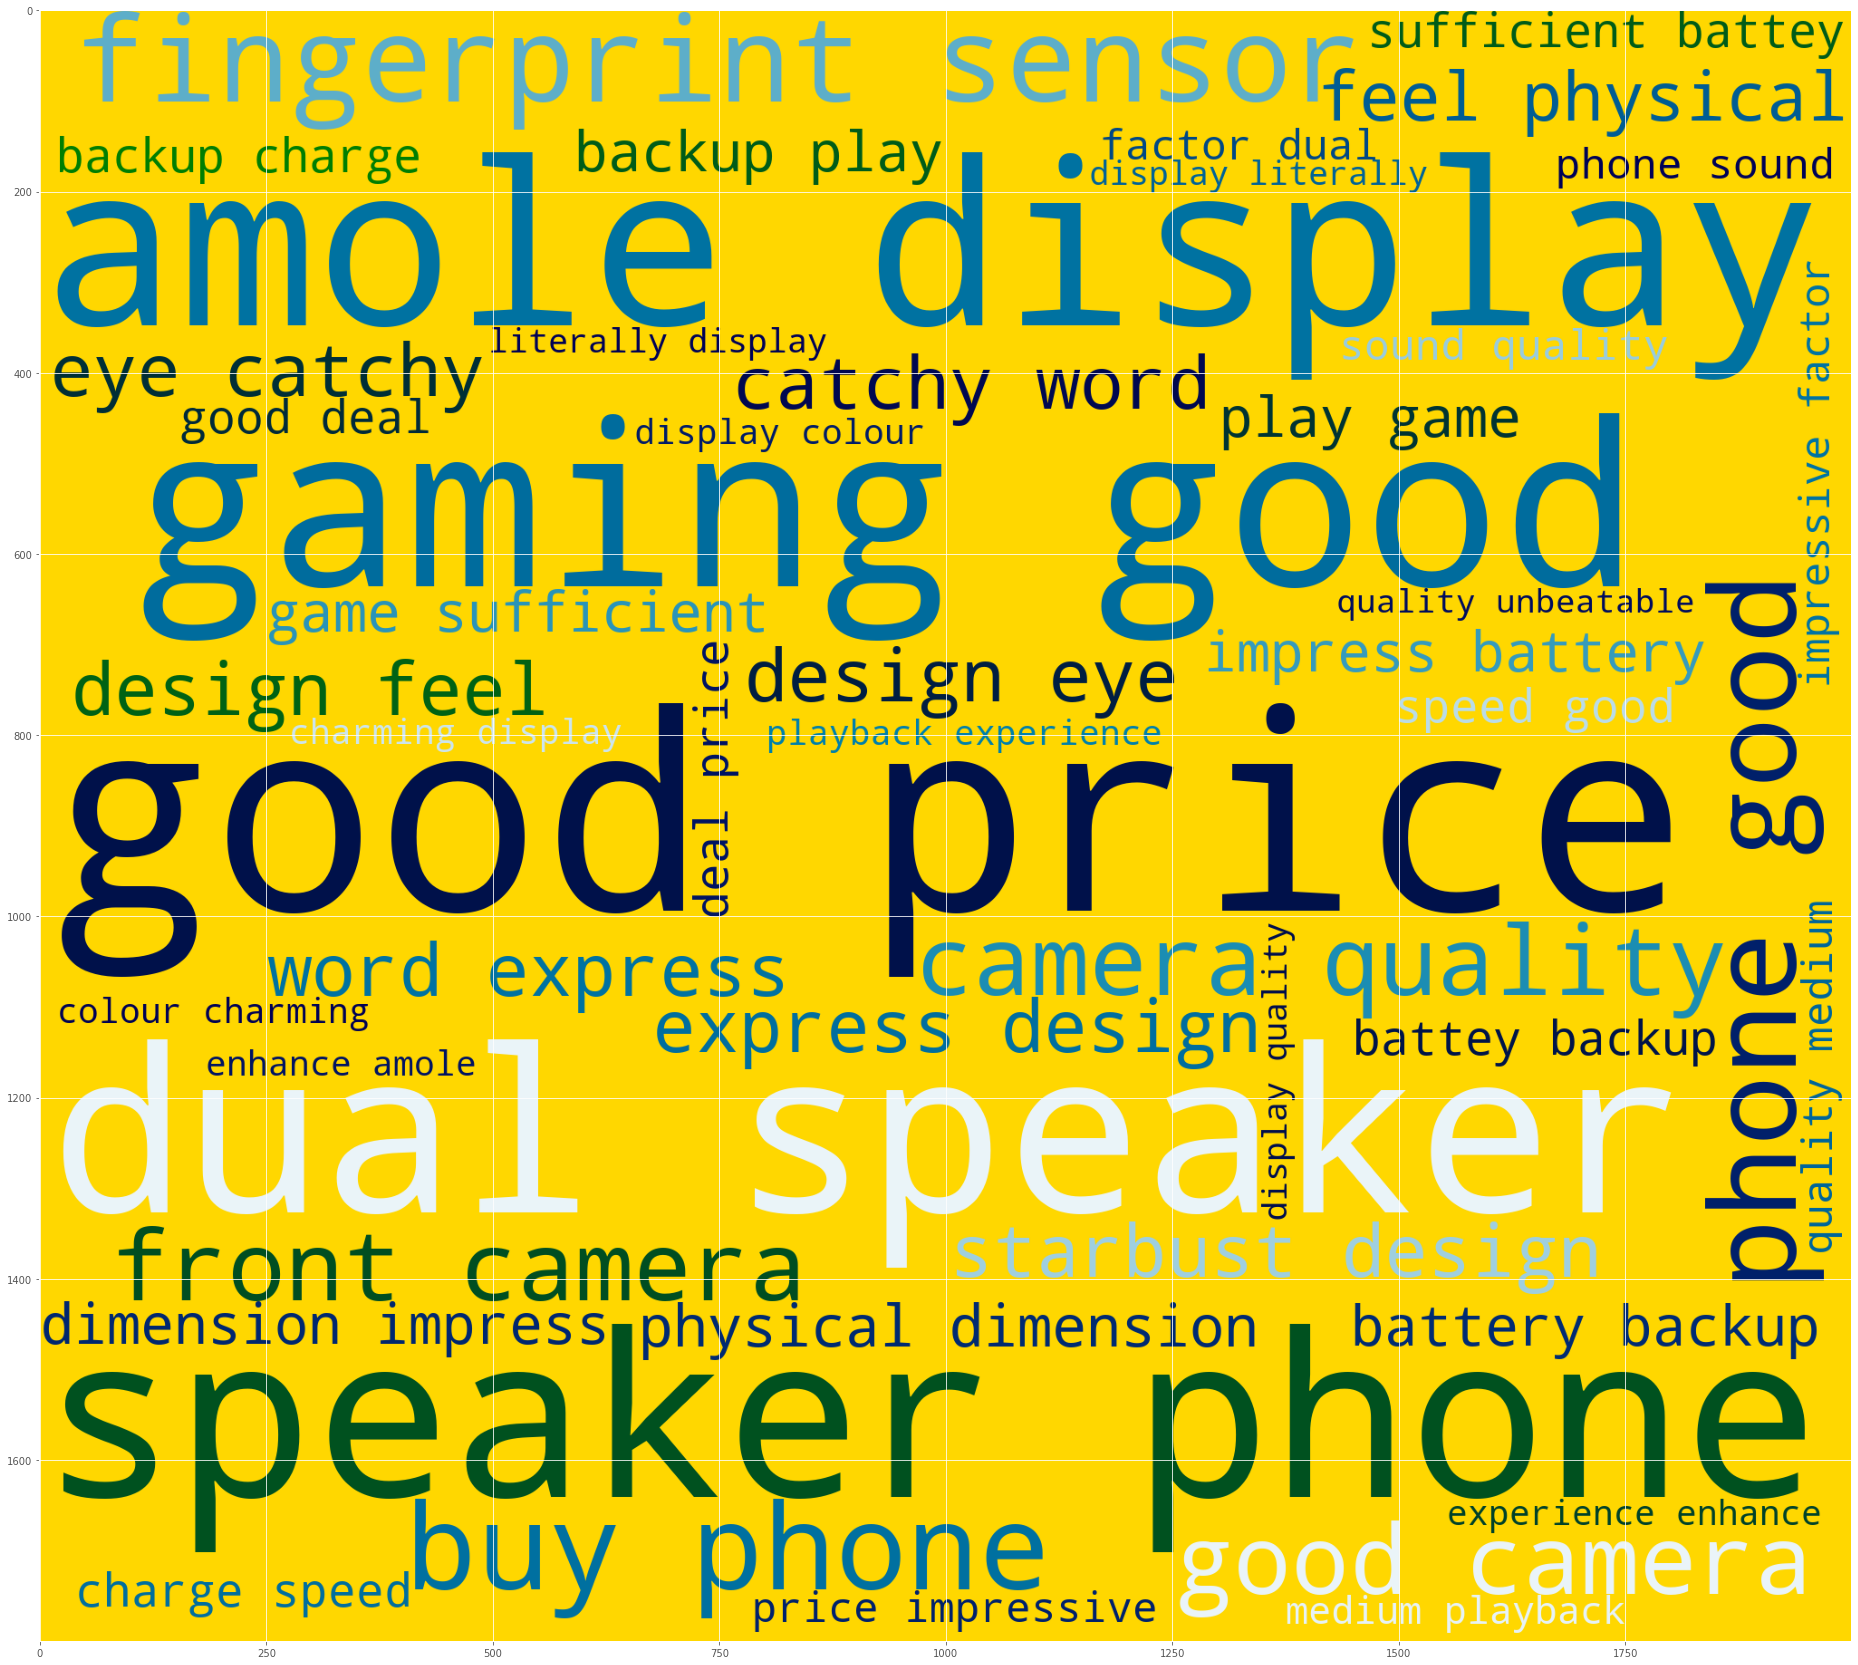

In [76]:
plt.figure(figsize=(40,30))
wordcloud_pos = WordCloud(
                      background_color='gold',
                       colormap='ocean',
                       max_words=50,
                      width=2000,
                      height=1800
                     ).generate(clean_reviews)
plt.imshow(wordcloud_pos)
plt.show()

## Feature Extraction :
## 1. Using CountVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(stop_tokens)
print(cv.vocabulary_)

{'starbust': 170, 'design': 37, 'eye': 52, 'catchy': 23, 'word': 191, 'express': 51, 'feel': 59, 'physical': 131, 'dimension': 39, 'impress': 84, 'battery': 11, 'backup': 8, 'play': 134, 'game': 66, 'sufficient': 171, 'battey': 12, 'charge': 24, 'speed': 168, 'good': 70, 'deal': 34, 'price': 142, 'impressive': 85, 'factor': 54, 'dual': 45, 'speaker': 166, 'phone': 127, 'sound': 165, 'quality': 146, 'medium': 104, 'playback': 135, 'experience': 50, 'enhance': 47, 'amole': 2, 'display': 43, 'colour': 26, 'charming': 25, 'literally': 97, 'unbeatable': 177, 'camera': 20, 'notch': 113, 'increase': 87, 'playing': 136, 'performance': 126, 'gaming': 67, 'point': 138, 'fingerprint': 62, 'button': 17, 'responsive': 157, 'feature': 57, 'pointonly': 139, 'disappointing': 41, 'bcoz': 13, 'hype': 81, 'company': 27, 'show': 162, 'mark': 103, 'professional': 144, 'photography': 130, 'grade': 74, 'redmi': 151, 'exchange': 48, 'plz': 137, 'request': 155, 'buy': 18, 'image': 83, 'picture': 133, 'website'

In [29]:
print(cv.get_feature_names()[0:300])

['add', 'amazing', 'amole', 'apprest', 'apt', 'audio', 'average', 'back', 'backup', 'bad', 'balanced', 'battery', 'battey', 'bcoz', 'beautiful', 'browse', 'budget', 'button', 'buy', 'call', 'camera', 'capture', 'casual', 'catchy', 'charge', 'charming', 'colour', 'company', 'conclusion', 'condition', 'conditionsmy', 'contact', 'date', 'day', 'deal', 'decent', 'default', 'design', 'difference', 'dimension', 'disadvantage', 'disappointing', 'discharge', 'display', 'drain', 'dual', 'easily', 'enhance', 'exchange', 'expect', 'experience', 'express', 'eye', 'facebook', 'factor', 'fail', 'fast', 'feature', 'feedback', 'feel', 'find', 'fine', 'fingerprint', 'fps', 'frequently', 'front', 'game', 'gaming', 'glitch', 'godso', 'good', 'google', 'gpu', 'grace', 'grade', 'great', 'gud', 'haptic', 'headphoneall', 'hefty', 'hour', 'hype', 'illustration', 'image', 'impress', 'impressive', 'inbuilte', 'increase', 'inhand', 'instagram', 'instal', 'itit', 'itpro', 'kind', 'lack', 'lag', 'light', 'literall

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [31]:
print(reviewscv.toarray()[100:300])

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [32]:
print(reviewscv.toarray().shape)

(12654, 195)


##  2. CountVectorizer with N-grams (Bigrams & Trigrams)

>![image.png](attachment:image.png)

In [33]:
from nltk.util import bigrams, trigrams, ngrams

In [34]:
bi_grams = list(nltk.bigrams(stop_tokens))
bi_grams

[('starbust', 'design'),
 ('design', 'eye'),
 ('eye', 'catchy'),
 ('catchy', 'word'),
 ('word', 'express'),
 ('express', 'design'),
 ('design', 'feel'),
 ('feel', 'physical'),
 ('physical', 'dimension'),
 ('dimension', 'impress'),
 ('impress', 'battery'),
 ('battery', 'backup'),
 ('backup', 'play'),
 ('play', 'game'),
 ('game', 'sufficient'),
 ('sufficient', 'battey'),
 ('battey', 'backup'),
 ('backup', 'charge'),
 ('charge', 'speed'),
 ('speed', 'good'),
 ('good', 'deal'),
 ('deal', 'price'),
 ('price', 'impressive'),
 ('impressive', 'factor'),
 ('factor', 'dual'),
 ('dual', 'speaker'),
 ('speaker', 'phone'),
 ('phone', 'sound'),
 ('sound', 'quality'),
 ('quality', 'medium'),
 ('medium', 'playback'),
 ('playback', 'experience'),
 ('experience', 'enhance'),
 ('enhance', 'amole'),
 ('amole', 'display'),
 ('display', 'colour'),
 ('colour', 'charming'),
 ('charming', 'display'),
 ('display', 'literally'),
 ('literally', 'display'),
 ('display', 'quality'),
 ('quality', 'unbeatable'),
 ('u

In [77]:
#Frequency of words 

import collections
def frequency(grams):
  fre = collections.Counter(grams)
  fre=dict(fre)
  sort = sorted(fre.items(), key=lambda x:x[1], reverse=True)
  converted_dict = dict(sort)
  print(converted_dict)
  

In [36]:
frequency(bi_grams)

{('good', 'price'): 111, ('dual', 'speaker'): 74, ('speaker', 'phone'): 74, ('amole', 'display'): 74, ('gaming', 'good'): 74, ('buy', 'phone'): 74, ('fingerprint', 'sensor'): 74, ('phone', 'good'): 74, ('camera', 'quality'): 74, ('front', 'camera'): 74, ('good', 'camera'): 74, ('starbust', 'design'): 37, ('design', 'eye'): 37, ('eye', 'catchy'): 37, ('catchy', 'word'): 37, ('word', 'express'): 37, ('express', 'design'): 37, ('design', 'feel'): 37, ('feel', 'physical'): 37, ('physical', 'dimension'): 37, ('dimension', 'impress'): 37, ('impress', 'battery'): 37, ('battery', 'backup'): 37, ('backup', 'play'): 37, ('play', 'game'): 37, ('game', 'sufficient'): 37, ('sufficient', 'battey'): 37, ('battey', 'backup'): 37, ('backup', 'charge'): 37, ('charge', 'speed'): 37, ('speed', 'good'): 37, ('good', 'deal'): 37, ('deal', 'price'): 37, ('price', 'impressive'): 37, ('impressive', 'factor'): 37, ('factor', 'dual'): 37, ('phone', 'sound'): 37, ('sound', 'quality'): 37, ('quality', 'medium'): 3

In [37]:
tri_grams=list(nltk.trigrams(stop_tokens))
tri_grams

[('starbust', 'design', 'eye'),
 ('design', 'eye', 'catchy'),
 ('eye', 'catchy', 'word'),
 ('catchy', 'word', 'express'),
 ('word', 'express', 'design'),
 ('express', 'design', 'feel'),
 ('design', 'feel', 'physical'),
 ('feel', 'physical', 'dimension'),
 ('physical', 'dimension', 'impress'),
 ('dimension', 'impress', 'battery'),
 ('impress', 'battery', 'backup'),
 ('battery', 'backup', 'play'),
 ('backup', 'play', 'game'),
 ('play', 'game', 'sufficient'),
 ('game', 'sufficient', 'battey'),
 ('sufficient', 'battey', 'backup'),
 ('battey', 'backup', 'charge'),
 ('backup', 'charge', 'speed'),
 ('charge', 'speed', 'good'),
 ('speed', 'good', 'deal'),
 ('good', 'deal', 'price'),
 ('deal', 'price', 'impressive'),
 ('price', 'impressive', 'factor'),
 ('impressive', 'factor', 'dual'),
 ('factor', 'dual', 'speaker'),
 ('dual', 'speaker', 'phone'),
 ('speaker', 'phone', 'sound'),
 ('phone', 'sound', 'quality'),
 ('sound', 'quality', 'medium'),
 ('quality', 'medium', 'playback'),
 ('medium', 'pl

In [38]:
frequency(tri_grams)

{('starbust', 'design', 'eye'): 37, ('design', 'eye', 'catchy'): 37, ('eye', 'catchy', 'word'): 37, ('catchy', 'word', 'express'): 37, ('word', 'express', 'design'): 37, ('express', 'design', 'feel'): 37, ('design', 'feel', 'physical'): 37, ('feel', 'physical', 'dimension'): 37, ('physical', 'dimension', 'impress'): 37, ('dimension', 'impress', 'battery'): 37, ('impress', 'battery', 'backup'): 37, ('battery', 'backup', 'play'): 37, ('backup', 'play', 'game'): 37, ('play', 'game', 'sufficient'): 37, ('game', 'sufficient', 'battey'): 37, ('sufficient', 'battey', 'backup'): 37, ('battey', 'backup', 'charge'): 37, ('backup', 'charge', 'speed'): 37, ('charge', 'speed', 'good'): 37, ('speed', 'good', 'deal'): 37, ('good', 'deal', 'price'): 37, ('deal', 'price', 'impressive'): 37, ('price', 'impressive', 'factor'): 37, ('impressive', 'factor', 'dual'): 37, ('factor', 'dual', 'speaker'): 37, ('dual', 'speaker', 'phone'): 37, ('speaker', 'phone', 'sound'): 37, ('phone', 'sound', 'quality'): 37,

In [39]:
n_grams = list(nltk.ngrams(stop_tokens, 4))
n_grams

[('starbust', 'design', 'eye', 'catchy'),
 ('design', 'eye', 'catchy', 'word'),
 ('eye', 'catchy', 'word', 'express'),
 ('catchy', 'word', 'express', 'design'),
 ('word', 'express', 'design', 'feel'),
 ('express', 'design', 'feel', 'physical'),
 ('design', 'feel', 'physical', 'dimension'),
 ('feel', 'physical', 'dimension', 'impress'),
 ('physical', 'dimension', 'impress', 'battery'),
 ('dimension', 'impress', 'battery', 'backup'),
 ('impress', 'battery', 'backup', 'play'),
 ('battery', 'backup', 'play', 'game'),
 ('backup', 'play', 'game', 'sufficient'),
 ('play', 'game', 'sufficient', 'battey'),
 ('game', 'sufficient', 'battey', 'backup'),
 ('sufficient', 'battey', 'backup', 'charge'),
 ('battey', 'backup', 'charge', 'speed'),
 ('backup', 'charge', 'speed', 'good'),
 ('charge', 'speed', 'good', 'deal'),
 ('speed', 'good', 'deal', 'price'),
 ('good', 'deal', 'price', 'impressive'),
 ('deal', 'price', 'impressive', 'factor'),
 ('price', 'impressive', 'factor', 'dual'),
 ('impressive', 

In [40]:
frequency(n_grams)

{('starbust', 'design', 'eye', 'catchy'): 37, ('design', 'eye', 'catchy', 'word'): 37, ('eye', 'catchy', 'word', 'express'): 37, ('catchy', 'word', 'express', 'design'): 37, ('word', 'express', 'design', 'feel'): 37, ('express', 'design', 'feel', 'physical'): 37, ('design', 'feel', 'physical', 'dimension'): 37, ('feel', 'physical', 'dimension', 'impress'): 37, ('physical', 'dimension', 'impress', 'battery'): 37, ('dimension', 'impress', 'battery', 'backup'): 37, ('impress', 'battery', 'backup', 'play'): 37, ('battery', 'backup', 'play', 'game'): 37, ('backup', 'play', 'game', 'sufficient'): 37, ('play', 'game', 'sufficient', 'battey'): 37, ('game', 'sufficient', 'battey', 'backup'): 37, ('sufficient', 'battey', 'backup', 'charge'): 37, ('battey', 'backup', 'charge', 'speed'): 37, ('backup', 'charge', 'speed', 'good'): 37, ('charge', 'speed', 'good', 'deal'): 37, ('speed', 'good', 'deal', 'price'): 37, ('good', 'deal', 'price', 'impressive'): 37, ('deal', 'price', 'impressive', 'factor'

In [41]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(stop_tokens)

In [42]:
print(cv_ngram_range.get_feature_names())

['add', 'amole', 'audio', 'average', 'back', 'backup', 'bad', 'battery', 'buy', 'call', 'camera', 'casual', 'charge', 'day', 'design', 'display', 'dual', 'experience', 'feature', 'feedback', 'feel', 'fingerprint', 'front', 'game', 'gaming', 'good', 'gud', 'hour', 'increase', 'light', 'make', 'medium', 'movie', 'nfc', 'nice', 'number', 'ofcourse', 'online', 'open', 'option', 'osm', 'pass', 'payment', 'people', 'perform', 'performance', 'phone', 'phoneif', 'phonethank', 'photography', 'physical', 'pic', 'picture', 'play', 'playback', 'playing', 'plz', 'point', 'pointonly', 'power', 'pretty', 'price', 'processor', 'professional', 'qualitiy', 'quality', 'range', 'rate', 'rear', 'recommend', 'redmi', 'refresh', 'regular', 'sensor', 'show', 'sound', 'speaker', 'split', 'sufficient', 'support', 'surely', 'task', 'timeyeah', 'touch', 'unbeatable', 'uninstalling', 'unsatisfied', 'upto', 'user', 'video', 'volte', 'wait', 'watch', 'web', 'website', 'whatsapp', 'wich', 'window', 'word', 'work']


In [43]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3. TF-IDF Vectorizer :

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(stop_tokens)

In [45]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['add', 'amazing', 'amole', 'apprest', 'apt', 'audio', 'average', 'back', 'backup', 'bad', 'balanced', 'battery', 'battey', 'bcoz', 'beautiful', 'browse', 'budget', 'button', 'buy', 'call', 'camera', 'capture', 'casual', 'catchy', 'charge', 'charming', 'colour', 'company', 'conclusion', 'condition', 'conditionsmy', 'contact', 'date', 'day', 'deal', 'decent', 'default', 'design', 'difference', 'dimension', 'disadvantage', 'disappointing', 'discharge', 'display', 'drain', 'dual', 'easily', 'enhance', 'exchange', 'expect', 'experience', 'express', 'eye', 'facebook', 'factor', 'fail', 'fast', 'feature', 'feedback', 'feel', 'find', 'fine', 'fingerprint', 'fps', 'frequently', 'front', 'game', 'gaming', 'glitch', 'godso', 'good', 'google', 'gpu', 'grace', 'grade', 'great', 'gud', 'haptic', 'headphoneall', 'hefty', 'hour', 'hype', 'illustration', 'image', 'impress', 'impressive', 'inbuilte', 'increase', 'inhand', 'instagram', 'instal', 'itit', 'itpro', 'kind', 'lack', 'lag', 'light', 'literall

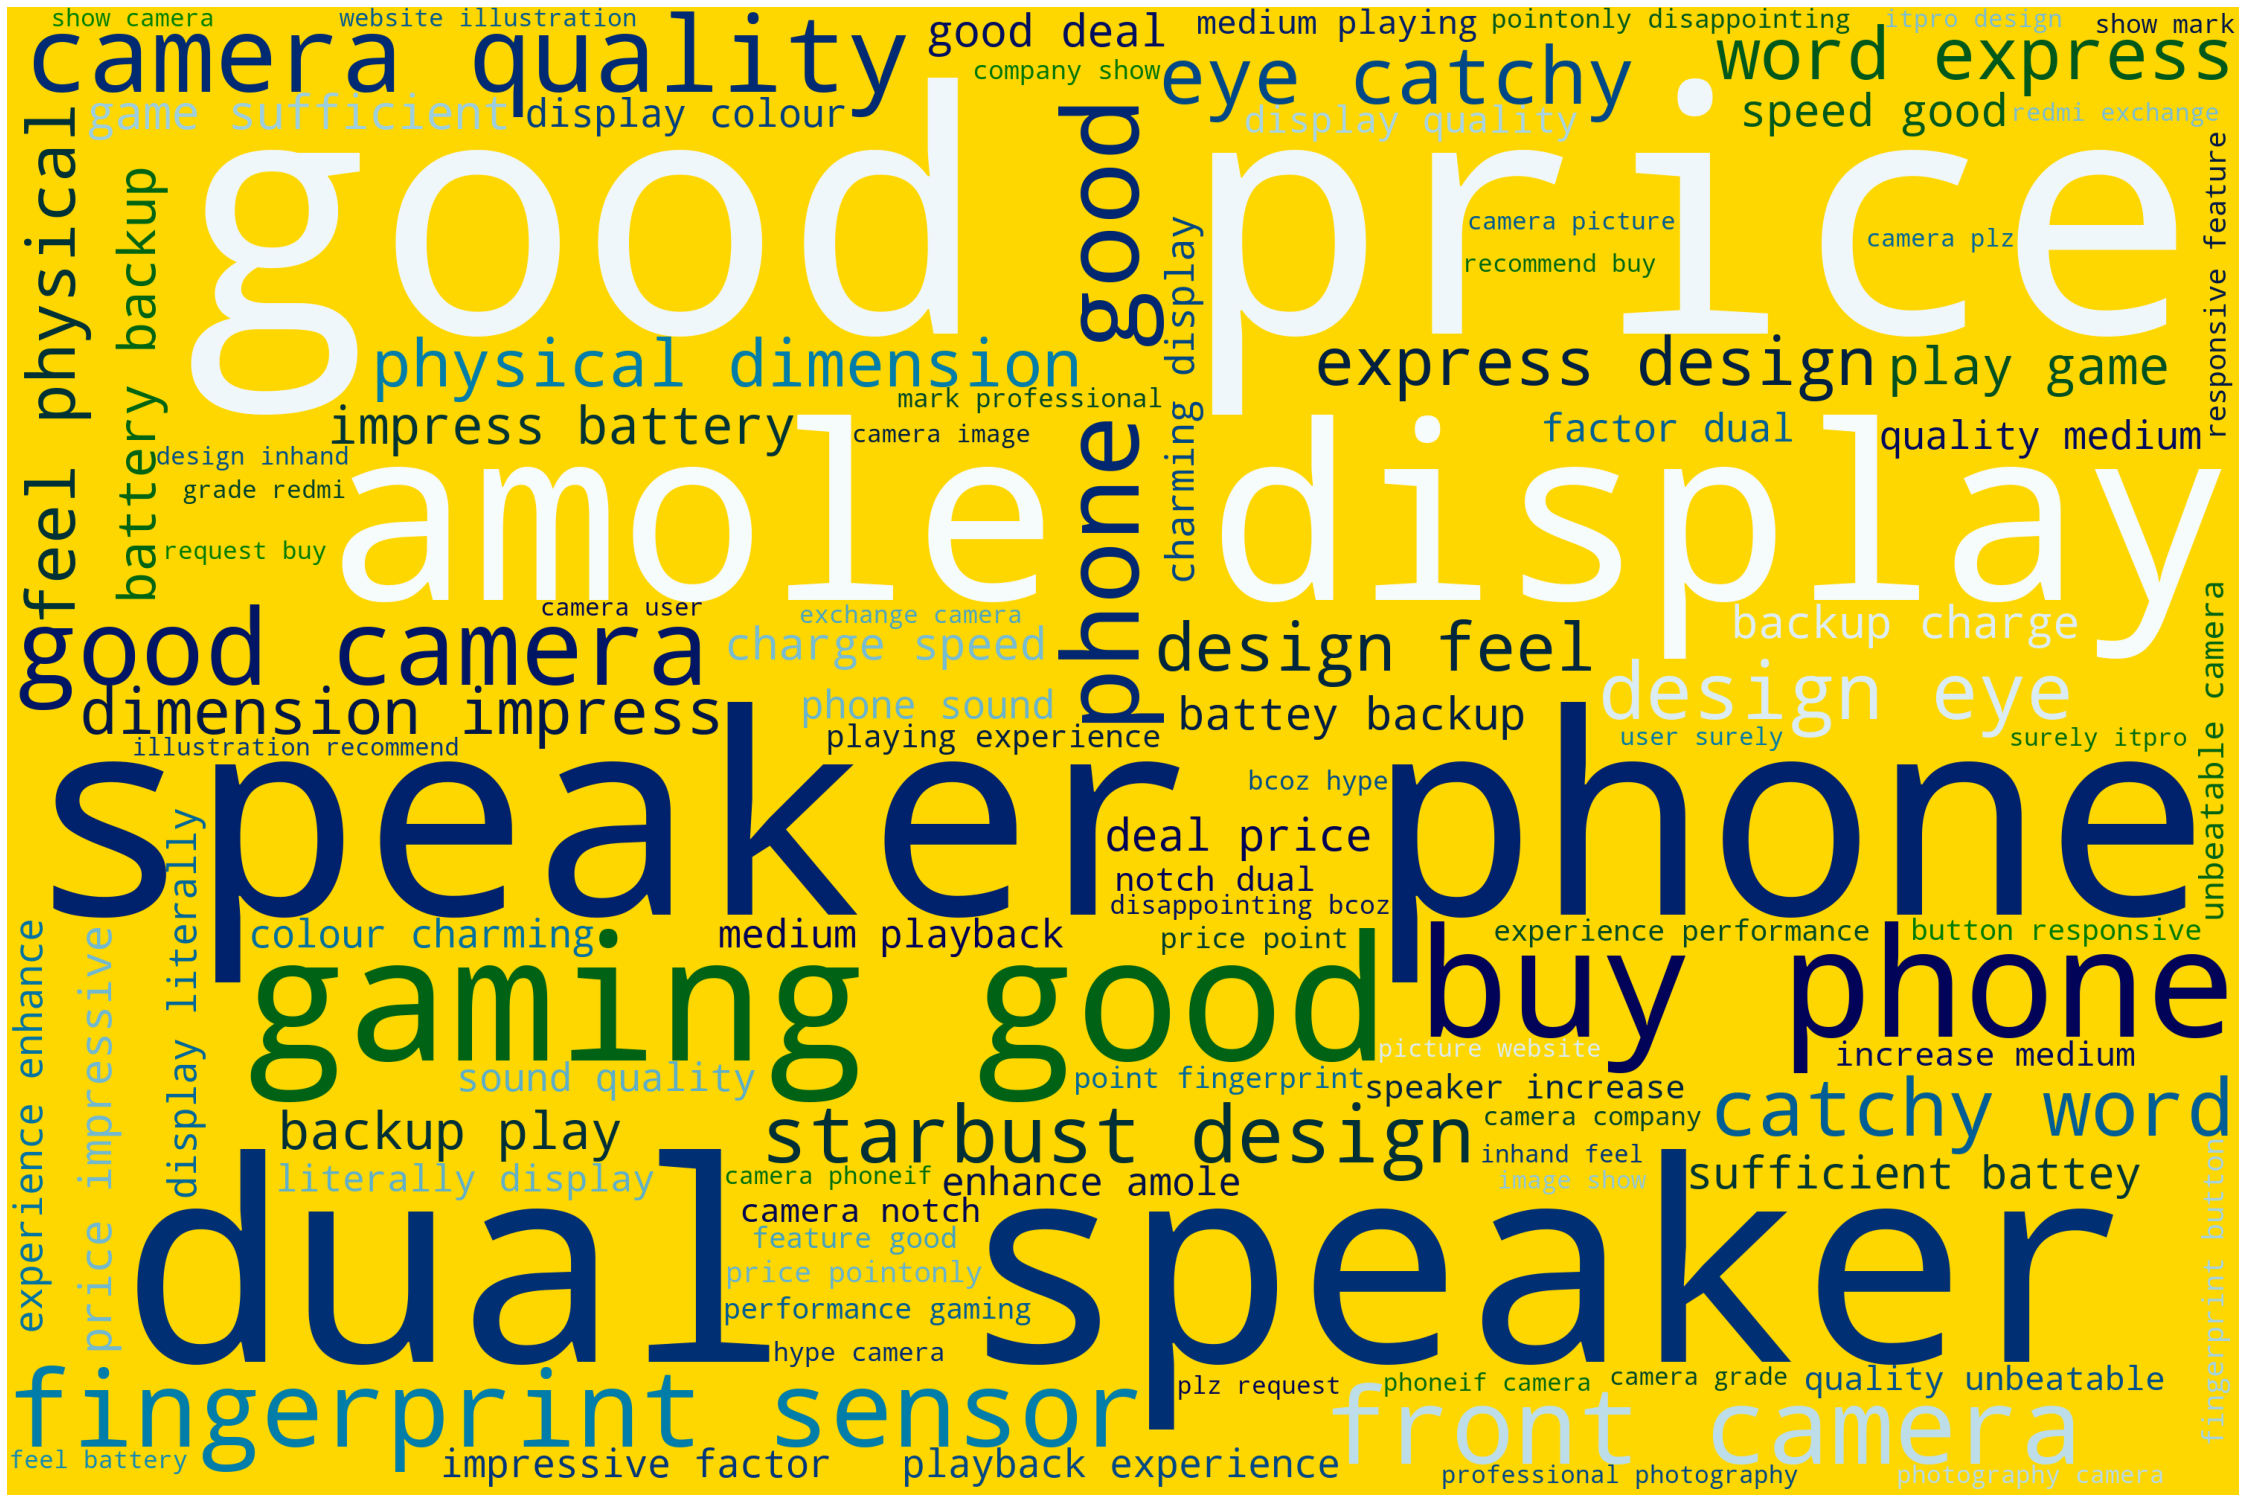

In [79]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

# STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='gold',max_words=100,
                   colormap='ocean').generate(clean_reviews)
plot_cloud(wordcloud)

## 3. TF-IDF Vectorizer :

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [48]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['able', 'about', 'accord', 'actually', 'add', 'all', 'almost', 'also', 'amazing', 'amole', 'an', 'and', 'another', 'any', 'app', 'apprest', 'apt', 'as', 'at', 'audio', 'average', 'back', 'backup', 'bad', 'balanced', 'battery', 'battey', 'bcoz', 'be', 'beautiful', 'because', 'between', 'browse', 'budget', 'but', 'button', 'buy', 'by', 'call', 'camera', 'can', 'capture', 'casual', 'catchy', 'charge', 'charming', 'clear', 'colour', 'company', 'conclusion', 'condition', 'conditionsmy', 'contact', 'date', 'day', 'deal', 'decent', 'default', 'design', 'difference', 'dimension', 'disadvantage', 'disappointing', 'discharge', 'display', 'do', 'drain', 'dual', 'easily', 'enhance', 'enough', 'etc', 'even', 'everything', 'exchange', 'expect', 'experience', 'express', 'eye', 'facebook', 'factor', 'fail', 'fast', 'feature', 'feedback', 'feel', 'find', 'fine', 'fingerprint', 'first', 'for', 'fps', 'frequently', 'front', 'full', 'game', 'gaming', 'get', 'give', 'glitch', 'go', 'godso', 'good', 'googl

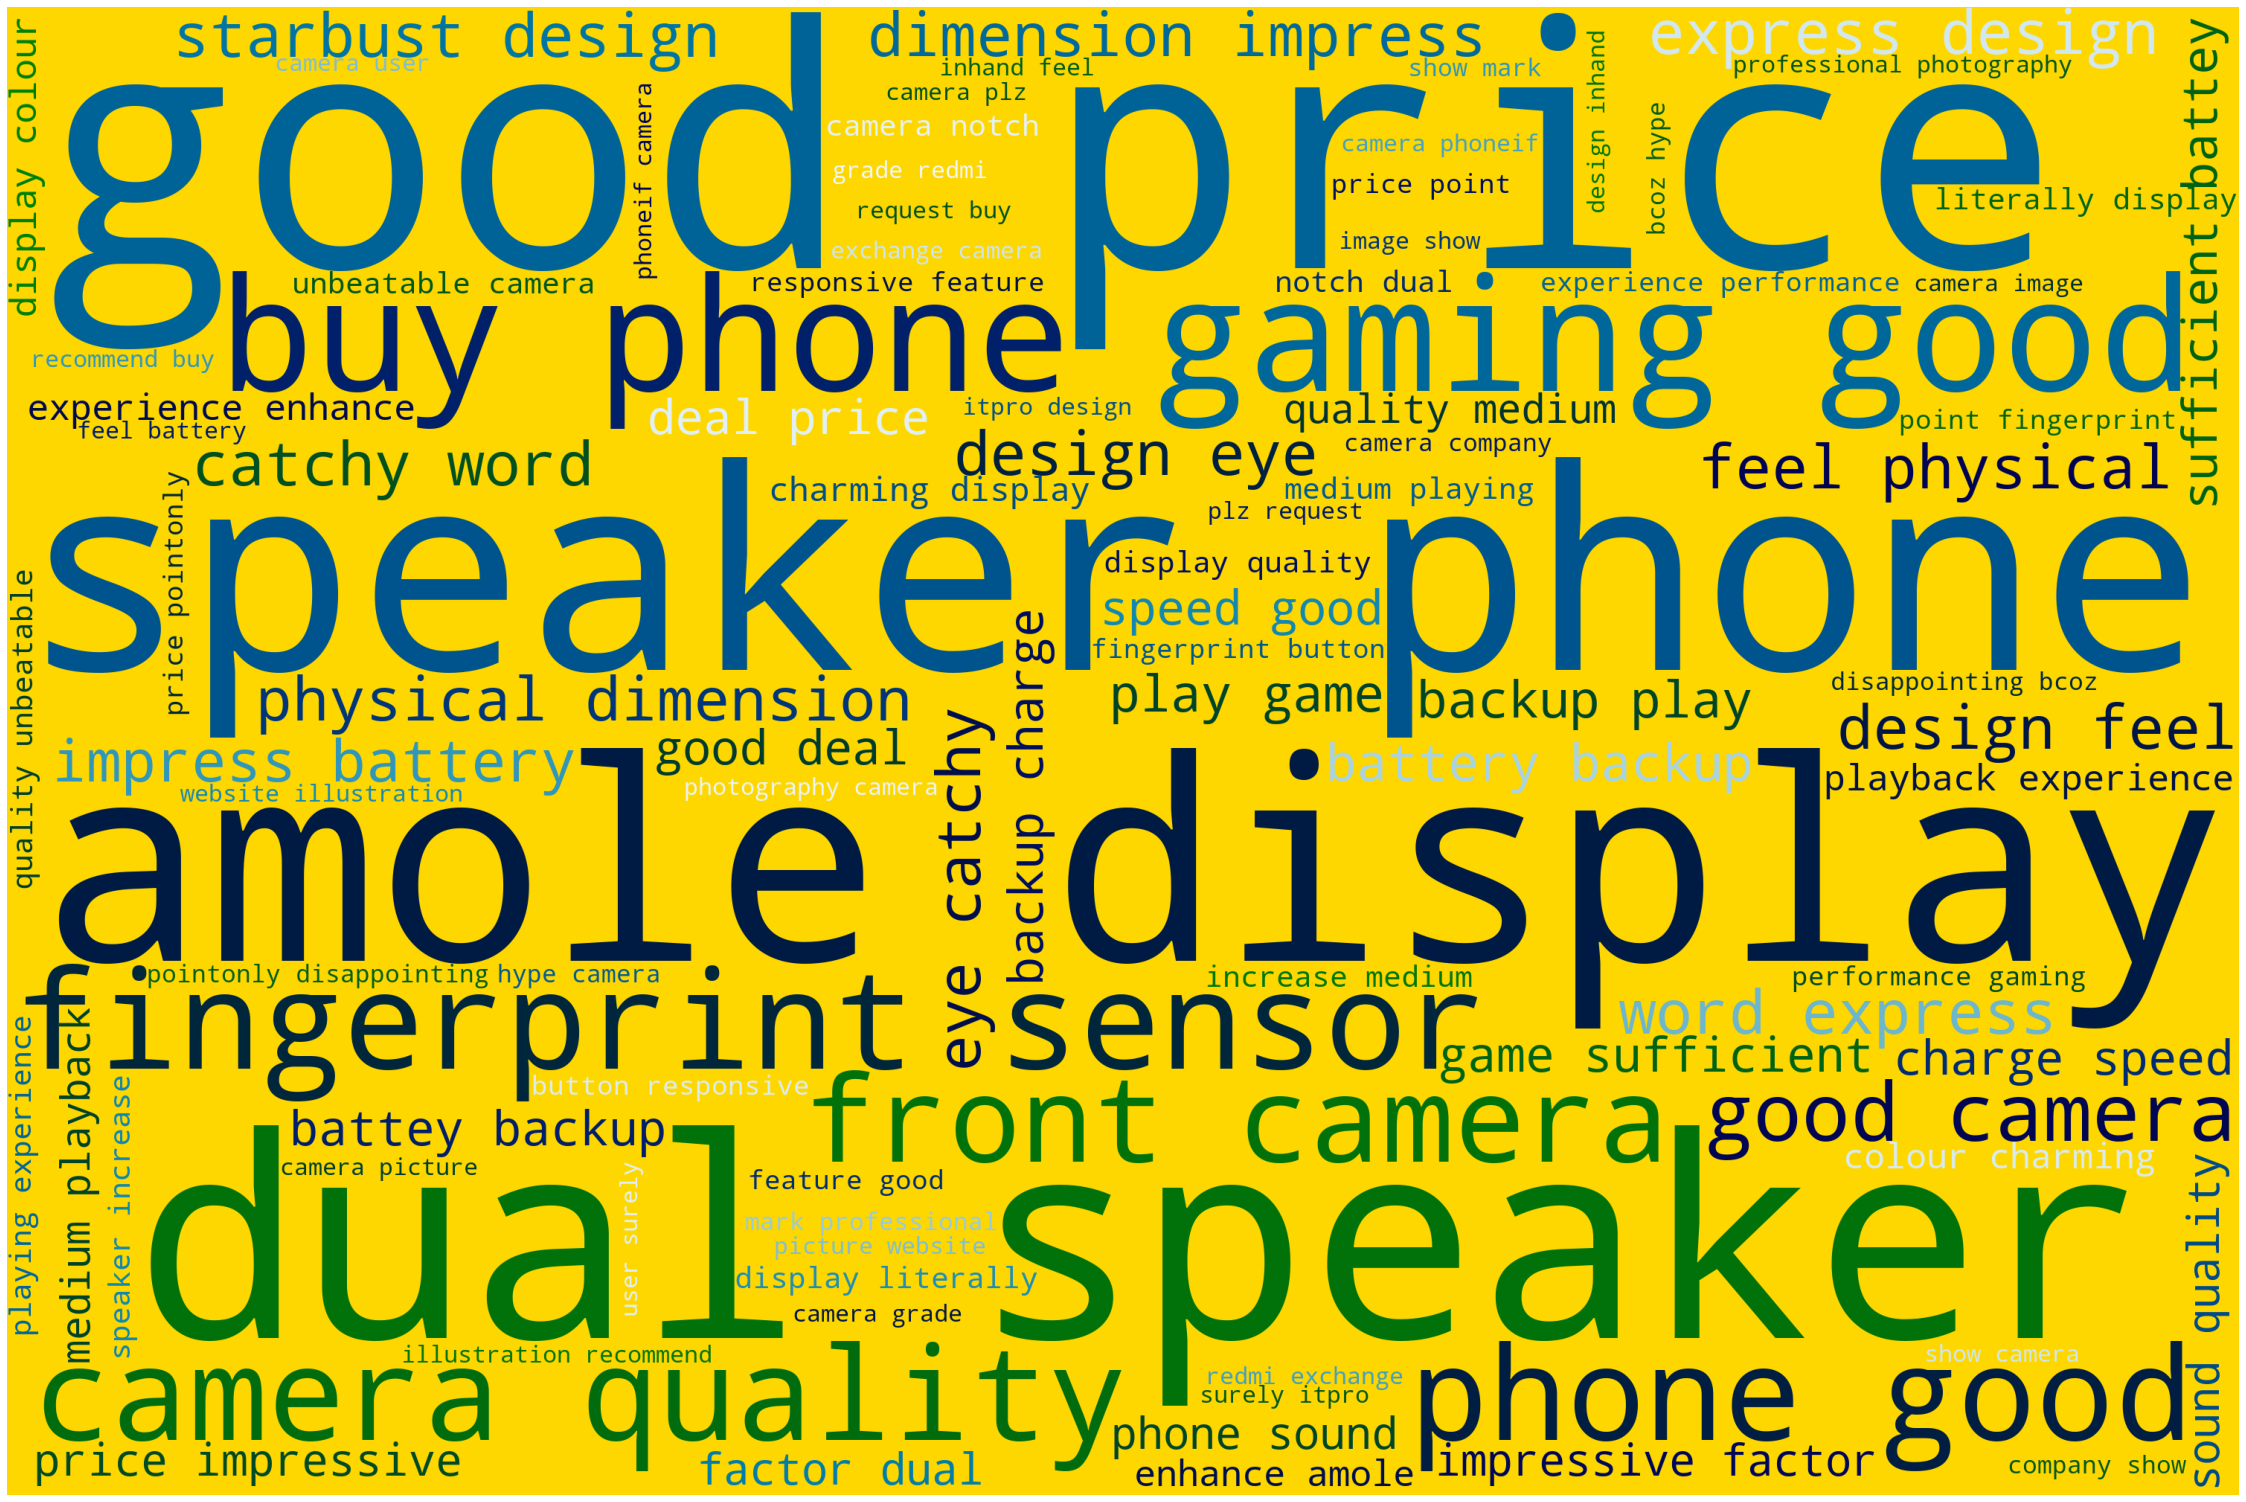

In [80]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

# STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='gold',max_words=100,
                   colormap='ocean',stopwords=stop_words).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition(NER)

> ![image.png](attachment:image.png)

In [50]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [51]:
for token in doc_block[100:200]:
    print(token,token.pos_)

charge NOUN
amole NOUN
display NOUN
dual ADJ
speakercon NOUN
camera NOUN
phone NOUN
great ADJ
camera NOUN
perform VERB
good ADJ
light ADJ
condition NOUN
recommend VERB
camera NOUN
lover PROPN
budget NOUN
phone NOUN
decent ADJ
performance NOUN
point NOUN
pass VERB
fingerprint NOUN
sensor NOUN
slow ADJ
response NOUN
touch NOUN
wait VERB
open ADJ
apprest NOUN
haptic ADJ
feedback NOUN
phone NOUN
good ADJ
display NOUN
nice ADJ
refresh ADJ
rate NOUN
ofcourse ADJ
beautiful ADJ
sound NOUN
balanced ADJ
speaker NOUN
pretty ADV
loud ADJ
easily ADV
watch NOUN
web NOUN
series NOUN
movie NOUN
online NOUN
headphoneall PROPN
regret ADJ
phone NOUN
support NOUN
nfc ADV
make VERB
payment NOUN
nfc NOUN
lack NOUN
point NOUN
timeyeah NOUN
phone NOUN
small ADJ
itit NOUN
month NOUN
phone NOUN
lot NOUN
instal ADJ
uninstalling NOUN
find NOUN
lag NOUN
date NOUN
grace NOUN
godso PROPN
wrap PROPN
feedback NOUN
surely ADV
buy VERB
phonethank NOUN
phone NOUN
point NOUN
amole NOUN
screen NOUN
gud ADJ
audio ADJ
qualit

In [52]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rate', 'sound', 'speaker', 'watch', 'web', 'series', 'movie', 'online', 'phone', 'support', 'make', 'payment', 'nfc', 'lack', 'point', 'timeyeah', 'phone', 'itit', 'month', 'phone', 'lot', 'uninstalling', 'find', 'lag', 'date', 'grace', 'feedback', 'buy', 'phonethank', 'phone', 'point', 'amole', 'screen', 'quality', 'watch', 'video', 'movie', 'speaker', 'quality', 'speaker', 'phone', 'battery', 'day', 'camera', 'quality', 'expect', 'pic', 'conditionsmy', 'conclusion', 'buy', 'phone', 'feature', 'display', 'audio', 'watch', 'movie', 'video', 'hour', 'battery', 'drain', 'day', 'gaming', 'picture', 'charge', 'phone', 'love', 'battery', 'increase', 'price', 'camera', 'camera', 'capture', 'camera', 'average', 'feel', 'camera', 'unsatisfied', 'redmi', 'note', 'phone', 'phone', 'camera', 'notice', 'difference', 'camera', 'redmi', 'increase', 'qualitiy', 'camera', 'number', 'redmi', 'phone', 'speaker', 'battery', 'fingerprint', 'sensor', 'multi', 'task', 'gaming', 'camera']


In [54]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0   camera    814
1    phone    592
2  battery    296
3  speaker    222
4  quality    222
5  display    222
6      buy    222
7     feel    148
8    price    148
9    point    148

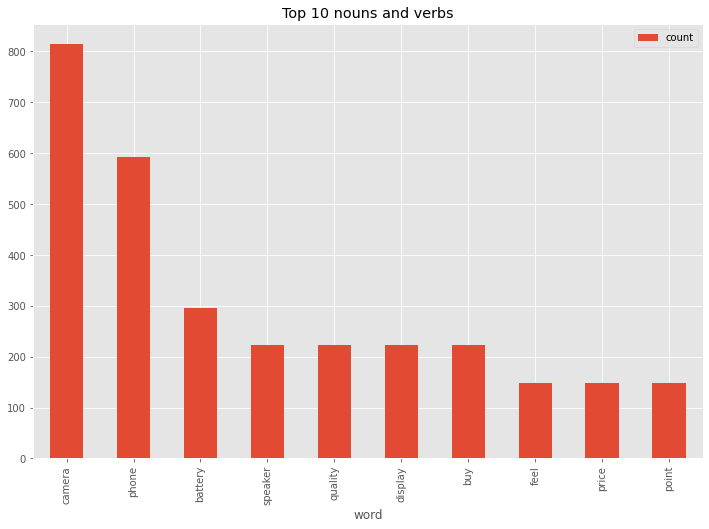

In [55]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [56]:
#Tokenization
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

["The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension.",
 "the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price.",
 "The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it.",
 "Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable.",
 'The camera notch and dual speaker increase the media playing experience.',
 'Other Performance like gaming is also good at this price point.',
 'Fingerprint button is also very responsive.',
 "All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and pro

In [57]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     The first look of this starbust design is eye ...
1     the second this which impress me, it's battery...
2     The third impressive factor is it's dual speak...
3     Media playback experience is also enhanced by ...
4     The camera notch and dual speaker increase the...
...                                                 ...
1586  No glitch as of now and I have bought it a lon...
1587  Gpu is kind of fine, if you are playing hefty ...
1588                         Osm phone in this range...
1589                                     Working gud...
1590                            Processor also fast....

[1591 rows x 1 columns]

In [60]:
Affin = pd.read_csv(r"/content/AFINN-en-165 (1).txt" , sep="\t")

Affin.columns = ["Word" , "Value"]

Affin.to_csv(r"C:\Users\Shivani Bhavsar\OneDrive\Documents\ExcelR Assignment files\DS\A11 Text Mining\AFINN-en-165.csv", index = None)
Affin

Word  Value
0      abandoned     -2
1       abandons     -2
2       abducted     -2
3      abduction     -2
4     abductions     -2
...          ...    ...
3376       yucky     -2
3377       yummy      3
3378      zealot     -2
3379     zealots     -2
3380     zealous      2

[3381 rows x 2 columns]

In [61]:
affinity_scores=Affin.set_index('Word')['Value'].to_dict()
affinity_scores

{'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'ac

In [62]:
# Custom function: score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [74]:
# manual testing
calculate_sentiment(text='happy')

3

In [64]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      -1
1       6
2       5
3       5
4       1
       ..
1586   -1
1587    5
1588    0
1589    0
1590    0
Name: sentiment_value, Length: 1591, dtype: int64

In [65]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       23
1       35
2       23
3       20
4       11
        ..
1586    21
1587    24
1588     5
1589     2
1590     3
Name: word_count, Length: 1591, dtype: int64

In [66]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
1226  Just only because of camera, I am quite unsati...               -2   
968   Just only because of camera, I am quite unsati...               -2   
753   Just only because of camera, I am quite unsati...               -2   
1484  Just only because of camera, I am quite unsati...               -2   
882   Just only because of camera, I am quite unsati...               -2   
...                                                 ...              ...   
964   I hope my feedback would surely help you if yo...               26   
61    I hope my feedback would surely help you if yo...               26   
1093  I hope my feedback would surely help you if yo...               26   
749   I hope my feedback would surely help you if yo...               26   
878   I hope my feedback would surely help you if yo...               26   

      word_count  
1226          14  
968           14  
753           14  
1484          14  
882           14  
...          ...  
964          163  
61           163  
1093         163  
749          163  
878          163  

[1591 rows x 3 columns]

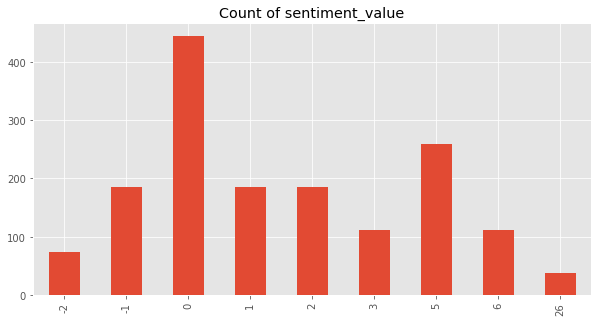

In [67]:
sent_df["sentiment_value"].value_counts().sort_index().plot(kind = "bar",
                                              title = "Count of sentiment_value" , 
                                              figsize = (10,5))
ax.set_xlabel("sentiment_value")
plt.show()

In [68]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1591.000000
mean        2.186047
std         4.364301
min        -2.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        26.000000
Name: sentiment_value, dtype: float64

In [69]:
# negative(-) and nutral(0) sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     The first look of this starbust design is eye ...               -1   
15    You can easily watch any web series or a movie...                0   
16    You can't make payments through NFC which is a...               -1   
17    If you've small hands, don't go for it.It's be...                0   
20         Front camera is also average which is 13 MP.                0   
...                                                 ...              ...   
1585    Enough battery gets you whole day without fail.               -2   
1586  No glitch as of now and I have bought it a lon...               -1   
1588                         Osm phone in this range...                0   
1589                                     Working gud...                0   
1590                            Processor also fast....                0   

      word_count  
0             23  
15            25  
16            28  
17            38  
20             9  
...          ...  
1585           8  
1586          21  
1588           5  
1589           2  
1590           3  

[703 rows x 3 columns]

In [70]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
1     the second this which impress me, it's battery...                6   
2     The third impressive factor is it's dual speak...                5   
3     Media playback experience is also enhanced by ...                5   
4     The camera notch and dual speaker increase the...                1   
5     Other Performance like gaming is also good at ...                5   
...                                                 ...              ...   
1575  The phone has got some good speakers battery 🔋...                6   
1576  The only thing I did not like r the cameras Ov...                5   
1581      This is the main feature which I didn't like.                2   
1583  Overall good but camera quality is worst..No 4...                1   
1587  Gpu is kind of fine, if you are playing hefty ...                5   

      word_count  
1             35  
2             23  
3             20  
4             11  
5             11  
...          ...  
1575          24  
1576          24  
1581           9  
1583          10  
1587          24  

[888 rows x 3 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


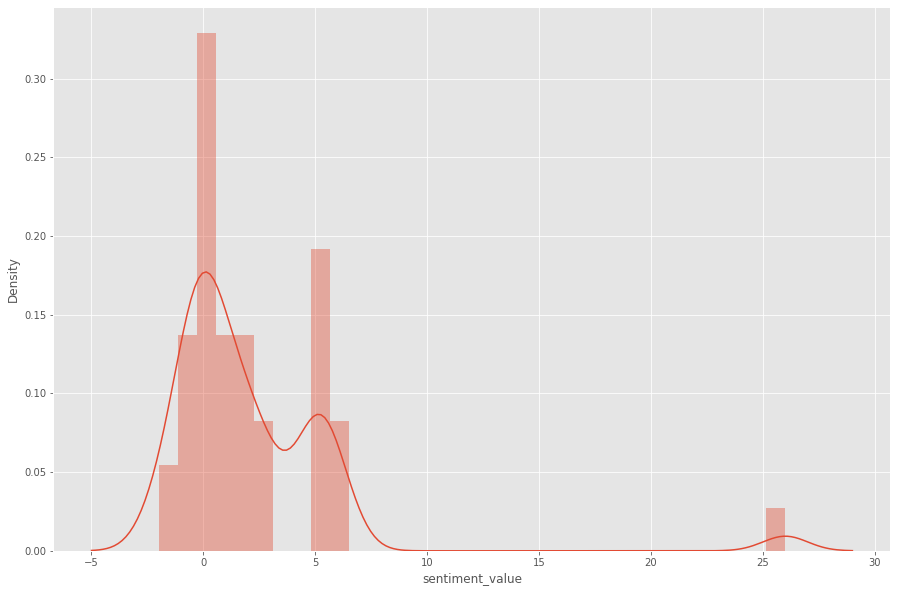

In [71]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

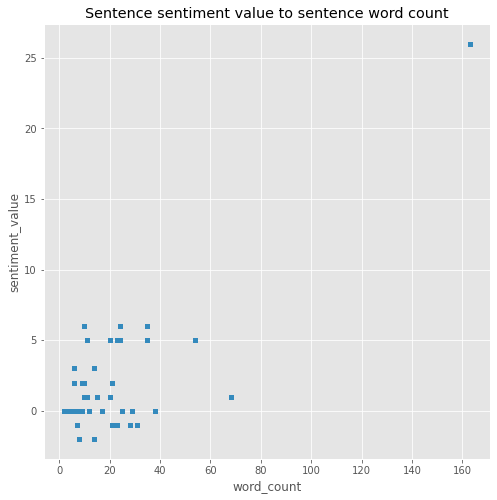

In [72]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
plt.show()